Sample size :  1
exponential: mean: 0.94982, variance: 0.83908
uniform: mean: 5.02870, variance: 8.03529
beta: mean: 0.28135, variance: 0.02571


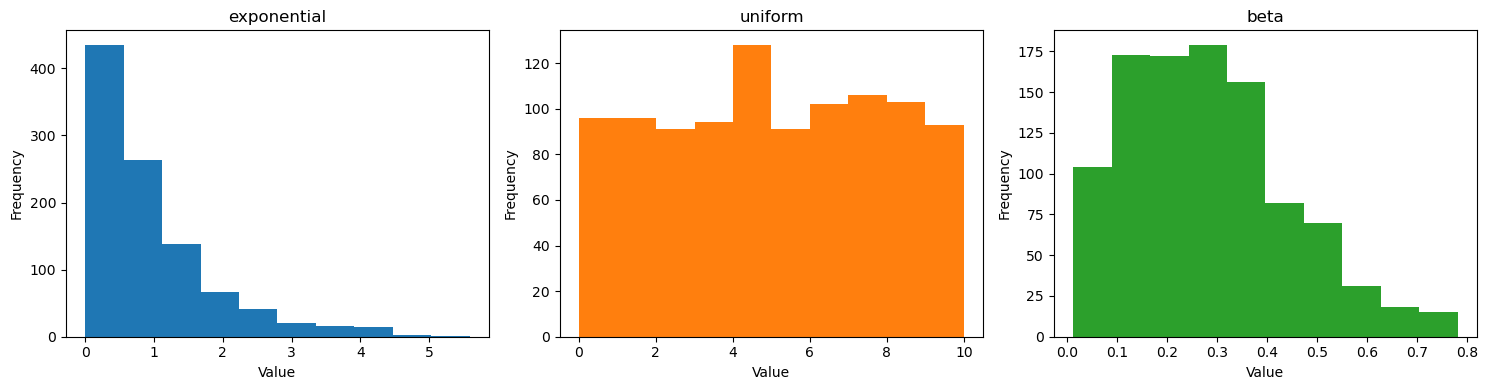

Sample size :  4
exponential: mean: 0.99640, variance: 0.23537
uniform: mean: 5.00321, variance: 2.19333
beta: mean: 0.28219, variance: 0.00646


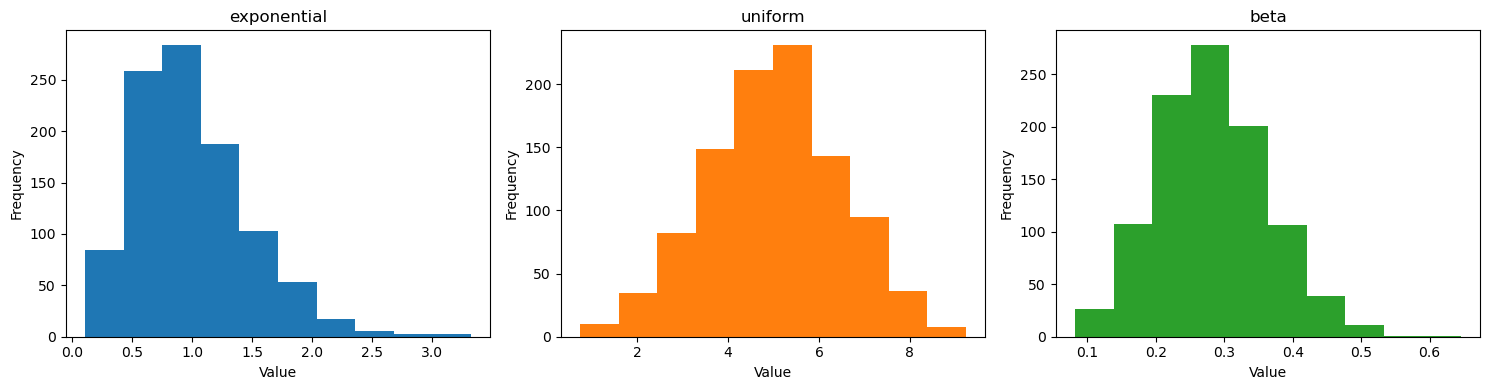

Sample size :  10
exponential: mean: 1.01282, variance: 0.10045
uniform: mean: 5.01287, variance: 0.83372
beta: mean: 0.28513, variance: 0.00256


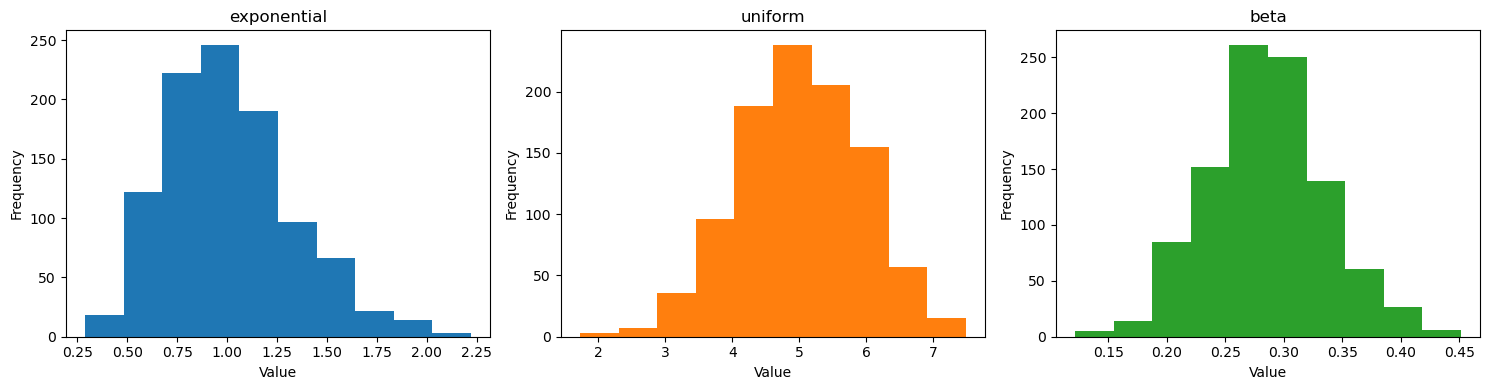

Sample size :  50
exponential: mean: 0.99979, variance: 0.01875
uniform: mean: 5.01472, variance: 0.16119
beta: mean: 0.28491, variance: 0.00049


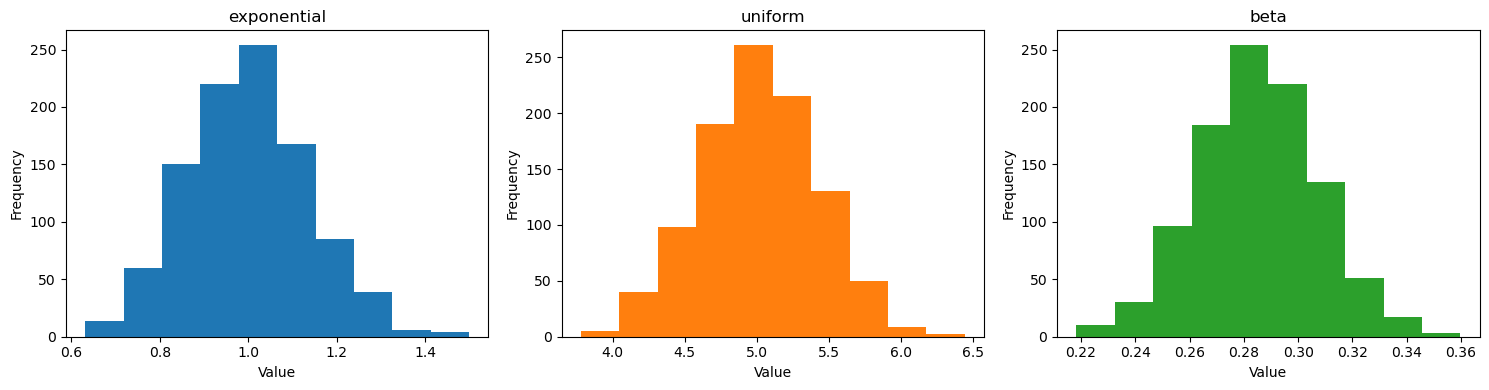

Sample size :  100
exponential: mean: 1.00368, variance: 0.01036
uniform: mean: 4.99347, variance: 0.08093
beta: mean: 0.28519, variance: 0.00025


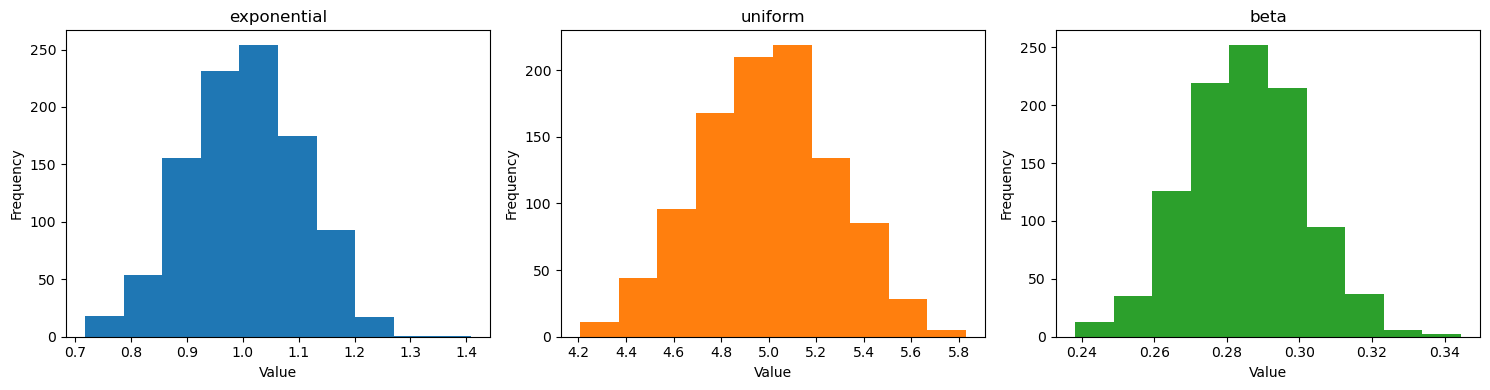

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

SAMPLE_NUMBER = 1000

def clt_generator(sample_size:int):
    
    exponential_means = []
    uniform_means = []
    beta_means = []
    
    mean = 0
    std_dev = 1
    low = 0
    high = 10
    lambda_param = 1
    alpha = 2
    beta = 5
    
    for i in range(SAMPLE_NUMBER):
        
        # Generate samples from different distributions
        uniform_samples = np.random.uniform(low, high, sample_size)
        exponential_samples = np.random.exponential(1/lambda_param, sample_size)
        beta_samples = np.random.beta(alpha, beta, sample_size)

        uniform_means.append(np.mean(uniform_samples))
        exponential_means.append(np.mean(exponential_samples))
        beta_means.append(np.mean(beta_samples))
        

    sample_means = pd.DataFrame({
        'exponential': exponential_means,
        'uniform': uniform_means,
        'beta': beta_means
    })
    
    return sample_means;

def plotting(df, sample_size:int):
    fig, axs = plt.subplots(1, len(df.columns), figsize=(15, 4))
    print("Sample size : ", sample_size)
    
    for i, col in enumerate(df.columns):
        axs[i].hist(df[col], color='C{}'.format(i))
        axs[i].set_title(col)
        caption=str(col)+": mean: "+str("{:.5f}".format(df[col].mean()))+", variance: "+str("{:.5f}".format(df[col].var()))
        print(caption)
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')
        

    plt.tight_layout()
    
    plt.show()
    
    
testing_sample_sizes = [1, 4, 10 , 50, 100]

for size in testing_sample_sizes:
    plotting(clt_generator(size), size)